Importing data and required packages

In [1]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline


#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')



Importing  the csv data as pandas


In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/Gladie34/studentsperformance_data/main/StudentsPerformance.csv")

In [5]:
#show top 5 records
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#preparing  x and y  variables

x=data.drop(columns=['math score'],axis=1)


In [7]:
y=data['math score']

In [8]:
from sklearn.preprocessing import OneHotEncoder


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



In [10]:
## Define numerical and categorical features
num_features = [feature for feature in x.columns if x[feature].dtype != 'object']
cat_features = [feature for feature in x.columns if x[feature].dtype == 'object']

# Initialize transformers
cat_transformer = OneHotEncoder()
num_transformer = StandardScaler()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', cat_transformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ],
    remainder='passthrough'  # Keep the remaining columns not specified in transformers
)

# Fit and transform the data
x = preprocessor.fit_transform(x)



In [20]:
x.shape

(1000, 19)

In [23]:
# Get the names of transformed features
transformed_feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data array to a DataFrame
x = pd.DataFrame(x, columns=transformed_feature_names)
x



,OneHotEncoder__gender_female,OneHotEncoder__gender_male,OneHotEncoder__race/ethnicity_group A,OneHotEncoder__race/ethnicity_group B,OneHotEncoder__race/ethnicity_group C,OneHotEncoder__race/ethnicity_group D,OneHotEncoder__race/ethnicity_group E,OneHotEncoder__parental level of education_associate's degree,OneHotEncoder__parental level of education_bachelor's degree,OneHotEncoder__parental level of education_high school,OneHotEncoder__parental level of education_master's degree,OneHotEncoder__parental level of education_some college,OneHotEncoder__parental level of education_some high school,OneHotEncoder__lunch_free/reduced,OneHotEncoder__lunch_standard,OneHotEncoder__test preparation course_completed,OneHotEncoder__test preparation course_none,StandardScaler__reading score,StandardScaler__writing score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [12]:
#separate datasetinto train and test
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
x_train.shape, x_test.shape


((800, 19), (200, 19))

Create and evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square


In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print('- Root mean squared Error:{:.4f}'.format(model_train_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("- R2 Score:{:.4f}".format(model_train_r2))

    print('.......................')

    print("Model performance for test set")
    print("- Root mean squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.4f} ".format(model_test_mae))
    print("R2 score :{:.4f}".format(model_test_r2))
    print("=" * 35)

    r2_list.append(model_test_r2)

print('\nModel R2 scores:', r2_list)

Linear Regression
Model performance for Training set
- Root mean squared Error:5.3271
- Mean Absolute Error:4.2694
- R2 Score:0.8741
.......................
Model performance for test set
- Root mean squared Error:5.4186
- Mean Absolute Error:4.2195 
R2 score :0.8793
Lasso
Model performance for Training set
- Root mean squared Error:6.5938
- Mean Absolute Error:5.2063
- R2 Score:0.8071
.......................
Model performance for test set
- Root mean squared Error:6.5197
- Mean Absolute Error:5.1579 
R2 score :0.8253
Ridge
Model performance for Training set
- Root mean squared Error:5.3233
- Mean Absolute Error:4.2650
- R2 Score:0.8743
.......................
Model performance for test set
- Root mean squared Error:5.3904
- Mean Absolute Error:4.2111 
R2 score :0.8806
K-Neighbors Regressor
Model performance for Training set
- Root mean squared Error:5.7077
- Mean Absolute Error:4.5167
- R2 Score:0.8555
.......................
Model performance for test set
- Root mean squared Error:7.

Results

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"])

,Model Name,R2_Score
4,Decision Tree,0.754005
3,K-Neighbors Regressor,0.783813
1,Lasso,0.825320
6,XGBRegressor,0.827797
8,AdaBoost Regressor,0.847876
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.854243
0,Linear Regression,0.879342
2,Ridge,0.880593


AdaBoost Regression

In [16]:
# Initialize LinearRegression
lin_model = LinearRegression(fit_intercept=True)

# Fit the model
lin_model.fit(x_train, y_train)

# Make predictions
y_predict = lin_model.predict(x_test)

# Calculate R-squared score
score = r2_score(y_test, y_predict)
print("Accuracy of the model is {:.2%}".format(score))

Accuracy of the model is 87.93%


plot y_pred and y_test

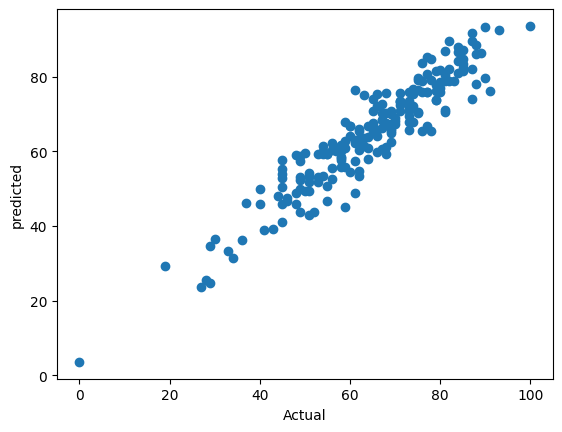

In [17]:
plt.scatter(y_test,y_predict);
plt.xlabel("Actual");
plt.ylabel("predicted");

<Axes: xlabel='math score'>

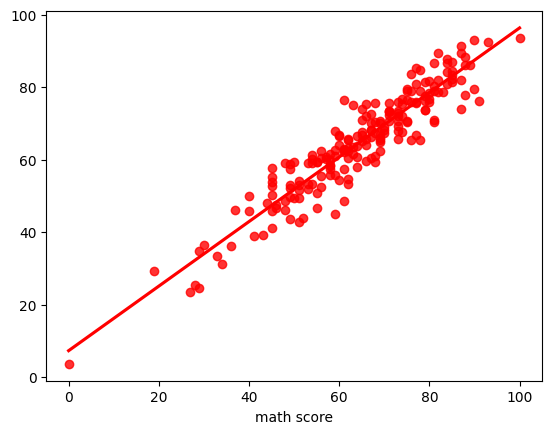

In [18]:
sns.regplot(x=y_test,y=y_predict,ci=None,color='red')

In [19]:
pred_df=pd.DataFrame({'Actual value':y_test,"predicted vale":y_predict,"Difference":y_test-y_predict})
pred_df.sort_values(by='Difference')

,Actual value,predicted vale,Difference
158,61,76.53125,-15.53125
371,45,57.68750,-12.68750
318,63,75.18750,-12.18750
589,48,59.09375,-11.09375
816,45,55.28125,-10.28125
...,...,...,...
867,61,48.75000,12.25000
199,78,65.56250,12.43750
859,87,74.06250,12.93750
265,59,45.12500,13.87500
